### **DATA MINING FINAL PROJECT**
Group Members: Trent Becker, Adam Kalman, Matthew Winningham, Caleb Yu

In this project, our goal is to predict whether a high school student is more likely than not to seriously consider attempting suicide. We believe this is a pressing issue in society, as mental health awareness is a topic that does not receive enough open conversation, particularly in younger demographics like high school students. Detecting a pattern of behavior for high school students that are more likely to initiate a suicide attempt will allow us to tag certain behaviors as indicators of mental health risk in order to provide students the help and support they need as early as possible. By doing this, we would be taking a step in the right direction of raising more awareness for students’ mental health.

Current methods of detecting student suicide risk rely on self reported data from students when they complete certain surveys, usually in a healthcare settings. These surveys make it clear what the goal is, making it far too easy for students to evade detection of their symptoms. Approaching the problem using data mining may allow us to decern a student's suicide risk without a student needing to explicitly disclose that they have mental health issue symptoms.

The dataset we selected to solve this problem is the 2019 CDC survey of youth risk behavior. The dataset questions students on general demographic information and their engagement in a number of different high risk activities including substance abuse, bullying, attempted suicide, and more. There were a total of over 100 different questions asked of students. The initial dataset has 13,677 rows of data, which means 13,677 individuals filled out the survey.

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sklearn

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

In [5]:
# Import data
data = pd.read_csv('XXHqn.csv', header='infer')
data

C:\Users\Administrator\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,site,raceeth,q6orig,q7orig,record,orig_rec,q1,q2,q3,q4,...,qnwater1,qnwater2,qnwater3,qnillict,BMIPCT,qnowt,qnobese,weight,stratum,psu
0,XX,7.0,504.0,121.0,1,NaN,5.0,2.0,2.0,1.0,...,1.0,1.0,1.0,2.0,46.882141,2.0,2.0,1.6659,213,57923
1,XX,8.0,503.0,119.0,2,NaN,4.0,2.0,2.0,2.0,...,1.0,1.0,1.0,2.0,62.232194,2.0,2.0,1.3851,213,57923
2,XX,8.0,506.0,95.0,3,NaN,4.0,1.0,2.0,2.0,...,1.0,1.0,2.0,2.0,0.590171,2.0,2.0,1.4958,213,57923
3,XX,5.0,510.0,152.0,4,NaN,4.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,69.786634,2.0,2.0,1.7114,213,57923
4,XX,6.0,510.0,130.0,5,NaN,5.0,2.0,2.0,1.0,...,1.0,1.0,1.0,2.0,16.739994,2.0,2.0,1.6659,213,57923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13672,XX,5.0,503,124,13865,NaN,4.0,1.0,1.0,2.0,...,1.0,1.0,1.0,NaN,69.885572,2.0,2.0,0.6099,201,787890
13673,XX,3.0,508,001,13866,NaN,6.0,2.0,2.0,2.0,...,2.0,2.0,2.0,NaN,NaN,NaN,NaN,0.5500,201,787890
13674,XX,5.0,600,120,13869,NaN,5.0,2.0,3.0,2.0,...,NaN,NaN,NaN,NaN,0.758043,2.0,2.0,0.6322,201,787890
13675,XX,7.0,505,125,13870,NaN,5.0,2.0,3.0,1.0,...,1.0,1.0,1.0,NaN,49.312869,2.0,2.0,0.5394,201,787890


### **INITIAL DATA CLEANING**

According to IBM Data Analyitics, "80% of a data scientist's valuable time" is spent on data cleaning. We want to make sure we spend sufficient amount of time on data cleaning, as it is vital to successfully analyze the data.

From initially looking at our data, we noticed a few issues that we have to deal with -- the main one being missing values. Let's first see how many values are missing and whether or not there are specific columns that are missing a significant number of values, which should probably not be relied on. It is important to deal with missing values because they can lead to incorrect results.


In [6]:
# how many missing?
null_counts=data.isnull().sum()
total_counts = data.shape[0] * data.shape[1]
print("Total # of missing values:", null_counts.sum())
print("Total % of missing values:", null_counts.sum()/total_counts)
column_nullcounts=pd.DataFrame(null_counts).sort_values(by=0,ascending=False)
print("Total # of columns with more than 10,000 missing values:", column_nullcounts[column_nullcounts > 10000].count()[0])
print("Those columns have", column_nullcounts[column_nullcounts > 10000].sum()[0]/null_counts.sum(), "of all missing values")
print("Total # of columns with less than 1,000 missing values:", column_nullcounts[column_nullcounts < 1000].count()[0])
# it seems that there are a few variables missing A LOT of values
# perhaps these features should not be relied on
column_nullcounts

Total # of missing values: 397406
Total % of missing values: 0.20319243526087133
Total # of columns with more than 10,000 missing values: 12
Those columns have 0.33533464517395306 of all missing values
Total # of columns with less than 1,000 missing values: 44


,0
orig_rec,13677
qn33,13108
qn39,11088
qn44,10795
qndualbc,10652
...,...
stratum,0
weight,0
site,0
record,0


It looks like over 20% of the values are missing, which seems like somewhat of a significant amount. Though all but 5 columns have some missing data, the good news is that it seems like the majority of missing data is concentrated in a few columns (ex. 12 columns are missing over 10,000 values)

It also seems like a sufficient amount of columns are missing less than 1000 values (which is only abount 7% of the rows). Our data set started off with 143 columns; we definitely want to reduce that due to the curse of dimensionality. 

Let's also explore if certain rows are missing lots of values:

,0
0,0
1,53
2,147
3,187
4,267
...,...
107,4
108,3
109,1
110,1


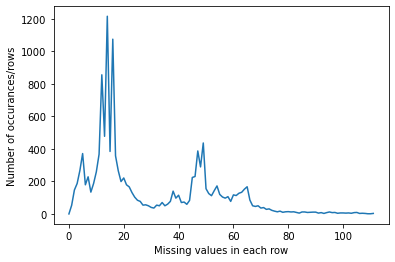

In [7]:
row_null_counts=pd.DataFrame(data.apply(lambda x: sum(x.isnull().values), axis = 1))

orig_null_bincount=pd.DataFrame(np.bincount(row_null_counts[0]))

plt.xlabel("Missing values in each row")
plt.ylabel("Number of occurances/rows")
plt.plot(orig_null_bincount)

orig_null_bincount

With so many records missing a significant amount of data, we thought it we would be best to perform a preliminary elimination of any feature that is missing over 5000 entries out of the ~13000 records in the dataset. This will help us explore the data in a way where we can be more intentional about our analysis with the features that mostly have data for each record. It is important to have features with lots of data because it also means that it is information that is more openly shared/answered in reality, which makes it a more reliable datapoint.

In [8]:
# let's start off by dropping any column that that >5000 missing values -- it just cant be useful
column_nullcounts_overhalf=column_nullcounts[column_nullcounts>5000].dropna()
column_nullcounts_overhalf #the columns to drop initally

data1 = data.drop(columns=column_nullcounts_overhalf.index)
data1.head()


,site,raceeth,q6orig,q7orig,record,q1,q2,q3,q4,q5,...,qnwater1,qnwater2,qnwater3,qnillict,BMIPCT,qnowt,qnobese,weight,stratum,psu
0,XX,7.0,504.0,121.0,1,5.0,2.0,2.0,1.0,A,...,1.0,1.0,1.0,2.0,46.882141,2.0,2.0,1.6659,213,57923
1,XX,8.0,503.0,119.0,2,4.0,2.0,2.0,2.0,A D,...,1.0,1.0,1.0,2.0,62.232194,2.0,2.0,1.3851,213,57923
2,XX,8.0,506.0,95.0,3,4.0,1.0,2.0,2.0,B E,...,1.0,1.0,2.0,2.0,0.590171,2.0,2.0,1.4958,213,57923
3,XX,5.0,510.0,152.0,4,4.0,2.0,2.0,2.0,E,...,1.0,1.0,1.0,1.0,69.786634,2.0,2.0,1.7114,213,57923
4,XX,6.0,510.0,130.0,5,5.0,2.0,2.0,1.0,NaN,...,1.0,1.0,1.0,2.0,16.739994,2.0,2.0,1.6659,213,57923


Furthermore, we don't want a model that requires 140+ attributes to predict one outcome, as many times it will be hard to obtain all this information for a single individual. Our original dataset (a survey to over 13,000 individuals with a lot of missing data) is evidence of how hard it might be to obtain all these points of data for 1 individual. Our chart and graph above show evidence of this as every single individual is missing at least 1 point of data. It is also evident that a significant amount of people didn't answer more than 10 of the datapoints.

If we can create a model with around 20 features rather than 140+, that would be much more practical and would shield us from the curse of dimensionality.

### **INITIAL DATA EXPLORATION ON LABEL**

Before, selecting the features for our model, we need to do some data exploration on our potential label classes. Let's explore the code a little bit and decide which question to use for the label as *there* are multiple labels that screen for suicide.
Our potential labels are:

Qn26: During the past 12 months, did you ever seriously consider attempting suicide?

Qn27: During the past 12 months, did you make a plan about how you would attempt suicide?

QN28: During the past 12 months, did you actually attempt suicide?


In [9]:
print("COUNT OF MISSING VALUES:")
print("Qn26: ", sum(data['qn26'].isnull()))
print("Qn27: ", sum(data['qn27'].isnull()))
print("Qn28: ", sum(data['qn28'].isnull()))

COUNT OF MISSING VALUES:
Qn26:  240
Qn27:  255
Qn28:  3157


It might at first seem that qn28 is definitionally the best fit for our modeling, as we are trying to predict actual suicide attempts. That being said, qn28 has the most missing data and by a significant amount (an additional almost 3000 missing entries compared to qn26 and qn27). As a result, maybe we want to use qn27 or qn28, especially if they are highly correlated with qn28. It makes sense to be able to use qn27 or qn26 because they are natural steps before the actual suicide attempt. 

Furthermore, each survey answer represents a student at one period of time. There may be students who have have had thoughts or plans for suicide (qn26/27) but have not yet made an attempt (qn28), but may in the future. If our goal is to prevent harm to students, it is best to catch students long before they ever make an attempt, when they may only have yet considered (qn26) or planned (qn27) a suicide attempt. This choice may lead to more "false positives" in the sense that our model may flag a student that only considers suicide but will never attempt, but we believe that the costs of a false positive far outweigh the cost of a false negative, a potentially suicidal student slipping through cracks. 

In [10]:
two_way_table_26 = pd.crosstab(index=data['qn26'], 
                          columns=data["qn28"])
print(two_way_table_26)
print("correctly categorized %:", (two_way_table_26.loc[1, 1] + two_way_table_26.loc[2, 2])/
  (two_way_table_26.loc[1, 1] + two_way_table_26.loc[1, 2] + two_way_table_26.loc[2, 1] + two_way_table_26.loc[2, 2]))

two_way_table_27 = pd.crosstab(index=data['qn27'], 
                          columns=data["qn28"])
print(two_way_table_27)
print("correctly categorized %:", (two_way_table_27.loc[1, 1] + two_way_table_27.loc[2, 2])/
  (two_way_table_27.loc[1, 1] + two_way_table_27.loc[1, 2] + two_way_table_27.loc[2, 1] + two_way_table_27.loc[2, 2]))

qn28  1.0   2.0
qn26           
1.0   860  1235
2.0   178  8166
correctly categorized %: 0.8646422071079606
qn28  1.0   2.0
qn27           
1.0   757   944
2.0   267  8465
correctly categorized %: 0.8839260040256878


Using evidence from the code above, we believe it is best to use qn27 as our label. qn27 seems to have a slightly stronger relationship with qn28, compared to qn26. Furthermore, it makes logical sense, as someone who has planned suicide is more likely to consider suicide than someone than someone who has thought of it. It seems logical that thinking precedes planning which precedes attempting. We want our data to get as close to attempting suicide as possible, so we will use planning suicide as a proxy.

### FURTHER DATA CLEANING



We want to begin by dropping every row that doesn't have a value for qn27. This makes logical sense because we already have over 13000 data entries and qn27 is only missing around 255 values.

In [11]:
data2 = data1.dropna(subset=['qn27'])
data2

,site,raceeth,q6orig,q7orig,record,q1,q2,q3,q4,q5,...,qnwater1,qnwater2,qnwater3,qnillict,BMIPCT,qnowt,qnobese,weight,stratum,psu
0,XX,7.0,504.0,121.0,1,5.0,2.0,2.0,1.0,A,...,1.0,1.0,1.0,2.0,46.882141,2.0,2.0,1.6659,213,57923
1,XX,8.0,503.0,119.0,2,4.0,2.0,2.0,2.0,A D,...,1.0,1.0,1.0,2.0,62.232194,2.0,2.0,1.3851,213,57923
2,XX,8.0,506.0,95.0,3,4.0,1.0,2.0,2.0,B E,...,1.0,1.0,2.0,2.0,0.590171,2.0,2.0,1.4958,213,57923
3,XX,5.0,510.0,152.0,4,4.0,2.0,2.0,2.0,E,...,1.0,1.0,1.0,1.0,69.786634,2.0,2.0,1.7114,213,57923
4,XX,6.0,510.0,130.0,5,5.0,2.0,2.0,1.0,NaN,...,1.0,1.0,1.0,2.0,16.739994,2.0,2.0,1.6659,213,57923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13672,XX,5.0,503,124,13865,4.0,1.0,1.0,2.0,E,...,1.0,1.0,1.0,NaN,69.885572,2.0,2.0,0.6099,201,787890
13673,XX,3.0,508,001,13866,6.0,2.0,2.0,2.0,C,...,2.0,2.0,2.0,NaN,NaN,NaN,NaN,0.5500,201,787890
13674,XX,5.0,600,120,13869,5.0,2.0,3.0,2.0,E,...,NaN,NaN,NaN,NaN,0.758043,2.0,2.0,0.6322,201,787890
13675,XX,7.0,505,125,13870,5.0,2.0,3.0,1.0,E,...,1.0,1.0,1.0,NaN,49.312869,2.0,2.0,0.5394,201,787890


### FEATURE SELECTION - DOMAIN KNOWLEDGE AND MISSING VALUES

Now that we have conducted an initial cleaning of the data and selected the appropriate class label, we want to remove some attributes in the data set that we do not believe are essential for our analysis on predicting whether a high school student will attempt suicide.

We can start with a combination of domain knowledge analysis and missing values ratio analysis to pick a subset of attributes that we believe will be useful in our models. 

We believe it makes a lot of sense to emphasize attributes that received a high response rate in the survey data because we want to run our models on attributes that high school students felt comfortable answering since these can be the most directly applied in real-world scenarios. By looking at the null values in each remaining column, we can emphasize attributes that have a majority of their data present while applying domain knowledge to determine whether the attribute could be a potential predictor.

In [12]:
column_nullcounts=pd.DataFrame(data2.isnull().sum()).sort_values(by=0,ascending=False)
# it seems that there are a few variables missing A LOT of values
# perhaps these features should not be relied on
column_nullcounts

,0
qn22,4858
qn90,4845
qn29,4746
qn97,4711
qn43,4634
...,...
weight,0
site,0
qn27,0
record,0


The following list are the columns we selected based on having a majority of their records present and being potential predictors:


*   qn13 - During the past 30 days, on how many days did you carry a weapon such as a gun, knife, or club on school
property?
*   qn15 - During the past 30 days, on how many days did you not go to school because you felt you would be unsafe at school
or on your way to or from school?
* qn16 - During the past 12 months, how many times has someone threatened or injured you with a weapon such as a gun,
knife, or club on school property?
* qn18 - During the past 12 months, how many times were you in a physical fight on school property?
* qn23 - During the past 12 months, have you ever been bullied on school property?
* qn24 - During the past 12 months, have you ever been electronically bullied?
* qn34 - Have you ever used an electronic vapor product?
* qn35 - During the past 30 days, on how many days did you use an electronic vapor product?
* qn37 - During the past 30 days, on how many days did you use chewing tobacco, snuff, dip, snus, or dissolvable tobacco products, such as Copenhagen, Grizzly, Skoal, or Camel Snus?
* qn38 - During the past 30 days, on how many days did you smoke cigars, cigarillos, or little cigars?
* qn41 - During the past 30 days, on how many days did you have at least one drink of alcohol?
* qn47 - During the past 30 days, how many times did you use marijuana?
* qn49 - During your life, how many times have you taken prescription pain medicine without a doctor's prescription or
differently than how a doctor told you to use it?
* qn52 - During your life, how many times have you used heroin?
* qn53 - During your life, how many times have you used methamphetamines?
* qn57 - During the past 12 months, has anyone offered, sold, or given you an illegal drug on school property?
* qn69 - During the past 7 days, how many times did you drink 100% fruit juices such as orange juice, apple juice, or grape
juice?
* qn70 - During the past 7 days, how many times did you eat fruit?
* qn78 - During the past 7 days, on how many days were you physically active for a total of at least 60 minutes per day?
* qn79 - On an average school day, how many hours do you watch TV?
* qn80 - On an average school day, how many hours do you play video or computer games or use a computer for something
that is not school work?
* qn84 - Have you ever been tested for HIV, the virus that causes AIDS?
* qn87 - Has a doctor or nurse ever told you that you have asthma?
* qn88 - On an average school night, how many hours of sleep do you get?
* qn89 - During the past 12 months, how would you describe your grades in school?
* q1 - How old are you?
* q2 - What is your sex?
* q3 - In what grade are you?
* raceeth - What is your race?
* qn27 - LABEL FEATURE: During the past 12 months, did you make a plan about how you would attempt suicide?

NOTE: All of the questions about risk behavior shown above were compiled into binary form in the original data set we are using.

These attributes were selected by sorting through the attributes that were missing relatively less values than other attributes. Of those attributes, we decided that demographic qualities, certain risky behaviors involving substance abuse and weapons, and different measures of overall physical and mental wellbeing were the best attributes to help predict a suicide attempt. While we now have an initial set of selected features, we plan on carrying out some backward feature elimination after more thorough data exploration and after modelling the data. 

In the cell below, we are simply renaming the attributes we have selected to include to be more interpretable for further data analysis.

In [13]:
# To make the data easier to interpret, we are going to rename the features
data2.rename(columns={'qn13': 'school_weapon_13', 'qn15': 'school_unsafe_15', 'qn16': 'school_threat_16', 'qn18': 'school_fighting_18', 'qn41': 'alcohol_use_41', 'qn47': 'marijuana_use_47',
                     'qn49': 'prescription_meds_49', 'qn57': 'drugs_at_school_57', 'qn78': 'physical_activity_78', 'qn79': 'tv_watching_79', 'qn80': 'computer_use_80', 'qn84': 'HIV_testing_84',
                     'qn87': 'asthma_87', 'qn88': 'good_sleep_88', 'qn89': 'good_grades_89', 'q1': 'age', 'q2': 'sex',
                     'q3': 'highschool_grade', 'qn27': 'suicide'}, inplace=True)

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


After conducting our first pass of feature selection using domain knowledge, we categorize the remaining attributes into miscellaneous columns that might have predictive capability, and we also group certain columns with similar survey questions so that we can perform feature creation on them.

For example, qn69 and qn70 both relate to a student's eating habits, so we group these in preparation for feature creation below.

In [14]:
# with so many missing values, we're going to hand pick the features we expect to possibly be predictive
good_columns=['school_weapon_13','school_unsafe_15','school_threat_16','school_fighting_18','alcohol_use_41','marijuana_use_47','prescription_meds_49','drugs_at_school_57','physical_activity_78','tv_watching_79','computer_use_80','HIV_testing_84','asthma_87','good_sleep_88','good_grades_89']
healthy_eating=['qn69','qn70']
nicotine_usage=['qn34','qn35','qn37','qn38']
hard_drugs=['qn52','qn53']
bullying=['qn23','qn24']
demographic=['raceeth','age','sex','highschool_grade']
label = ['suicide']

columns_to_retain = good_columns+healthy_eating+nicotine_usage+hard_drugs+bullying+demographic+label


Once we filter out all attributes that we did not select in the process above, we can compare the amount of missing values to the original data set to see if we now have a more concentrated data set to run our model on.

MISSING VALUES ANALYSIS: 



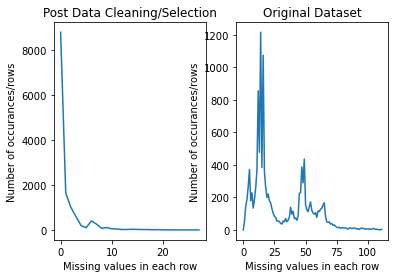

In [15]:
data3 = data2.filter(items=columns_to_retain,axis='columns')

row_null_counts=pd.DataFrame(data3.apply(lambda x: sum(x.isnull().values), axis = 1))

null_bincount2=pd.DataFrame(np.bincount(row_null_counts[0]))
print("MISSING VALUES ANALYSIS: \n")
plt.subplot(1, 2, 1)
plt.xlabel("Missing values in each row")
plt.ylabel("Number of occurances/rows")
plt.title('Post Data Cleaning/Selection')
plt.plot(null_bincount2)

plt.subplot(1, 2, 2)
plt.xlabel("Missing values in each row")
plt.ylabel("Number of occurances/rows")
plt.title('Original Dataset')
plt.plot(orig_null_bincount)

Our data cleaning, data exploration, and feature selection efforts have helped us get to a data set with much more meaningful records. The graph above displays the difference in that we have significantly less missing data in our updated data set compared to the original. 

Further, we have reduced our attribute set via feature selection in order to give our models the best chance of predictive capability. The next step is to conduct some feature engineering in order to combine attributes that had similar survey questions (i.e. like the healthy eating example above)

### FEATURE ENGINEERING
No need for one-hot encoding for most because the variables are either binary or integer encoding makes sense (ex. height). However, we will need one-hot encoding for the race variable, which we will do right before running the models.

One aspect of feature engineering we will do now is feature creation. Several of the selected attributes for our model ask similar questions, and we can combine these into a single feature. Our categories to combine are healthy_eating, hard_drugs, nicotine_usage, and bullying.
For each of these, we want to reflect the most extreme result as our combine value because we believe these results will be more meaningful in our data analysis.

For example, for hard drugs we want to emphasize whether the respondent answered that they used heroin or methamphetamines for *either* of the questions, and we will reflect that as one value. We believe that as long as they took one of these hard drugs; they should be marked for risky behavior. We also believe that doing more than 1 of these drugs does not necessarily show riskier behavior because it is more about frequency of doing the drugs and not the type of drugs. Similarly, we want to show if a respondent did *neither* of the drugs. We repeated this process for each of the categories.

In [16]:
data4 = data3.copy()

data4['healthy_eating'] = data4[healthy_eating].max(axis=1)
data4['hard_drugs'] = data4[hard_drugs].min(axis=1) #if either/both bad, mark bad
data4['nicotine_usage'] = data4[nicotine_usage].min(axis=1) #if either/both bad, mark bad
data4['bullying'] = data4[bullying].min(axis=1)

data4 = data4.drop(columns=healthy_eating)
data4 = data4.drop(columns=hard_drugs)
data4 = data4.drop(columns=nicotine_usage)
data4 = data4.drop(columns=bullying)

Because we have altered the attributes in our data set, we might as well also check whether we have helped eliminated more missing values.

MISSING VALUES ANALYSIS: 



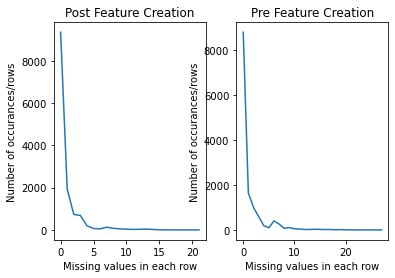

In [17]:
# now lets see how it looks
row_null_counts = pd.DataFrame(data4.apply(lambda x: sum(x.isnull().values), axis = 1))

null_bincount3 = pd.DataFrame(np.bincount(row_null_counts[0]))

print("MISSING VALUES ANALYSIS: \n")
plt.subplot(1, 2, 1)
plt.xlabel("Missing values in each row")
plt.ylabel("Number of occurances/rows")
plt.title('Post Feature Creation')
plt.plot(null_bincount3)

plt.subplot(1, 2, 2)
plt.xlabel("Missing values in each row")
plt.ylabel("Number of occurances/rows")
plt.title('Pre Feature Creation')
plt.plot(null_bincount2)

There seems to be a very slight improvement. As we have vastly improved from the original dataset, we can impute valid values for the remainder of the missing data points.

In [18]:
# lets see which selected columns have the most missing data
null_counts2 = data4.isnull().sum()
column_nullcounts = pd.DataFrame(null_counts2).sort_values(by=0,ascending=False)
column_nullcounts

,0
alcohol_use_41,996
hard_drugs,894
HIV_testing_84,887
tv_watching_79,853
school_weapon_13,727
asthma_87,718
healthy_eating,703
prescription_meds_49,670
good_grades_89,642
good_sleep_88,548


### IMPUTATION

To perform our imputation, we decided to go a different route than any of the methods described in class because a vast majority of our variables are binary. For binary variables, using a mean or mode did not make sense because mean would produce an arbitrary decimal result and mode would disproprtionately impute one of the binary values. Therefore, we decided to conduct a probability-based imputation where the value imputed for a missing entry is based on the distribution of the binary values in the remainder of the column. This is a much better way to extrapolate our given data into the missing values while maintaining the same distribution of known responses.

In [19]:
# Go through each feature and impute values - for binary substitute with with a probability distribution and for everything else use average
def impute_values(data):
  df_imputed = data.copy()
  non_binary = [] # We can add variables to this list as we go if we want to impute using the mean instead
  for column in df_imputed:
    if column in non_binary:
      mean = df_imputed[column].mean()
      missing_values = df_imputed[column].isnull()
      df_imputed.loc[missing_values, column] = mean
    else:
      probs = df_imputed[column].value_counts(normalize=True)
      missing_values = df_imputed[column].isnull()
      df_imputed.loc[missing_values, column] = np.random.choice(probs.index, size=len(df_imputed[missing_values]), p=probs.values)
  return df_imputed

df_imputed = impute_values(data4)
# Make sure the imputation worked by checking for null counts
null_counts_imputed=df_imputed.isnull().sum()
column_nullcounts_imputed=pd.DataFrame(null_counts_imputed).sort_values(by=0,ascending=False)
column_nullcounts_imputed

,0
school_weapon_13,0
school_unsafe_15,0
nicotine_usage,0
hard_drugs,0
healthy_eating,0
suicide,0
highschool_grade,0
sex,0
age,0
raceeth,0


In [20]:
df_imputed

,school_weapon_13,school_unsafe_15,school_threat_16,school_fighting_18,alcohol_use_41,marijuana_use_47,prescription_meds_49,drugs_at_school_57,physical_activity_78,tv_watching_79,...,good_grades_89,raceeth,age,sex,highschool_grade,suicide,healthy_eating,hard_drugs,nicotine_usage,bullying
0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,...,1.0,7.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,...,1.0,8.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,8.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
3,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,...,2.0,5.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
4,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,6.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13672,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,5.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0
13673,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,3.0,6.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0
13674,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,1.0,5.0,5.0,2.0,3.0,2.0,1.0,2.0,1.0,2.0
13675,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,1.0,7.0,5.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0


### DATA EXPLORATION ON SELECTED ATTRIBUTES

Next, we want to conduct a more thorough data exploration of each of the attributes we have selected to be a part of our model. We started with a general histogram portraying the distribution of responses for each attribute. 

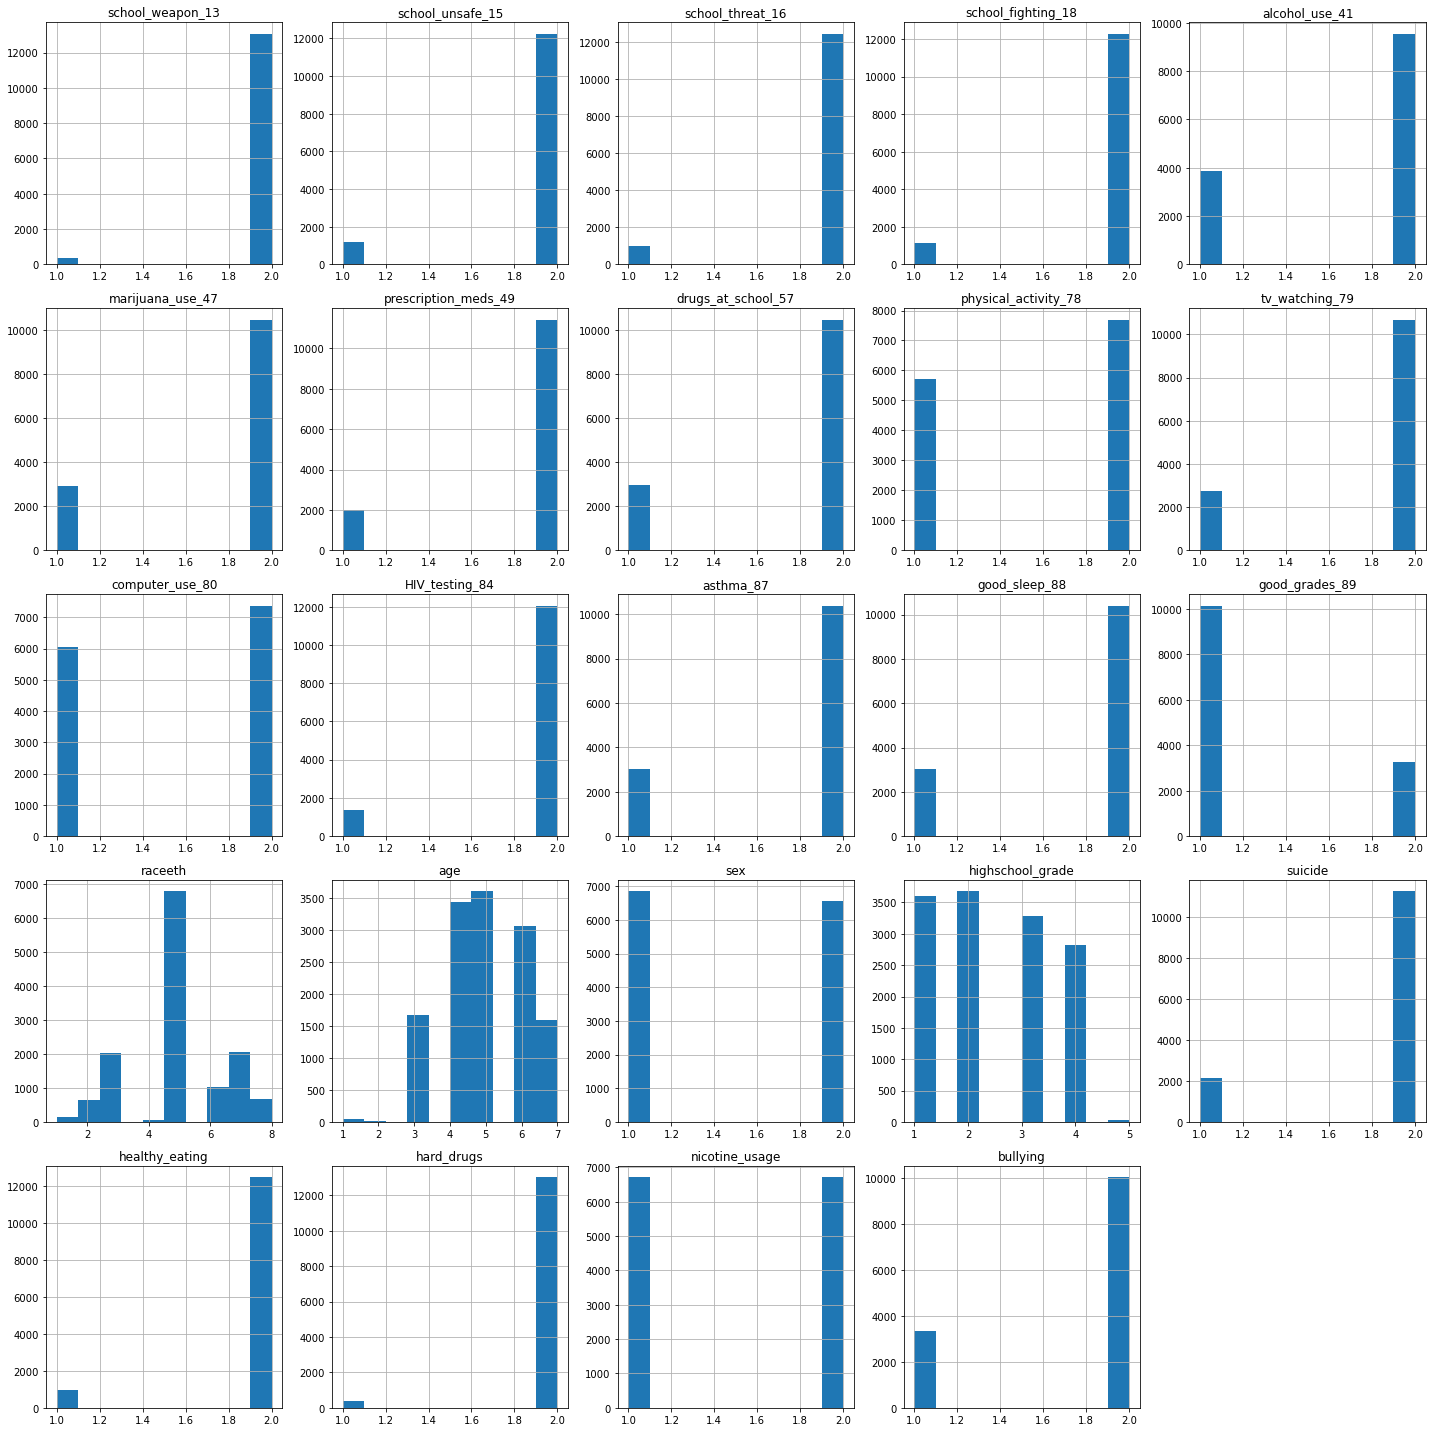

In [21]:
df_imputed.hist(figsize=(20,20))
plt.tight_layout()
plt.show()

When look at the histograms above, we can see that many of the behaviors related to substance abuse, school safety, and other specific ones like HIV testing are heavily skewed to the option that is the less risky behavior. Even though there is a heavy skew, it makes sense to keep these variables because they all seem valid in terms of predicting our label. Since these variables relate to risky behavior, it also makes sense that these events are truly rare in reality and so there is no need to balance.

Further, our label, suicide plan, is also skewed in that a significant majority of the respondents have not every made a plan to commit suicide. We need to keep this in mind before we run our models because it will be important to balance the dataset on our class label for more accurate predictions.

Further, it seems like demographic variables like sex and high school grade are evenly distributed, while raceeth seems to be dominated by white students and age seems to be somewhat normally distributed around the ages of 15 to 16 with ages 12 and 13 being significant outliers. We will keep this in mind as a possibility to remove these outliers of students at a younger age because our focus is on the traditional high school age anyways.

For the next step in data exploration, we want to see how significant of a relationship there is between our selected variables and whether a student has made a suicide plan attempt before. In the code below, we evaluate the impact each attribute has individually on our class label. To be more specific, we are creating a 2 way table and seeing whether the planned suicide % is different for the different classes within each feature.

In [22]:
for (columnName, columnData) in df_imputed.iteritems():
    two_way_table = pd.crosstab(index=df_imputed[columnName], 
                              columns=df_imputed["suicide"])
    print(two_way_table)
    if len(two_way_table) == 2:
      print("suicide planned rate for ", columnName, " :",
            two_way_table.loc[1, 1]/(two_way_table.loc[1, 1] + two_way_table.loc[1, 2]))
      print("suicide planned rate for NOT", columnName, " :",
            two_way_table.loc[2, 1]/(two_way_table.loc[2, 1] + two_way_table.loc[2, 2]))
        
      print()
    else:
      for i in range(1, len(two_way_table) + 1):
        index = two_way_table.index[i - 1]
        print("suicide rate for ", index, " :",
          two_way_table.loc[index, 1]/(two_way_table.loc[index, 1] + two_way_table.loc[index, 2]))


suicide            1.0    2.0
school_weapon_13             
1.0                118    251
2.0               2033  11020
suicide planned rate for  school_weapon_13  : 0.31978319783197834
suicide planned rate for NOT school_weapon_13  : 0.15574963609898107

suicide            1.0    2.0
school_unsafe_15             
1.0                362    826
2.0               1789  10445
suicide planned rate for  school_unsafe_15  : 0.3047138047138047
suicide planned rate for NOT school_unsafe_15  : 0.14623181298021906

suicide            1.0    2.0
school_threat_16             
1.0                334    657
2.0               1817  10614
suicide planned rate for  school_threat_16  : 0.33703329969727547
suicide planned rate for NOT school_threat_16  : 0.14616684096211086

suicide              1.0    2.0
school_fighting_18             
1.0                  307    839
2.0                 1844  10432
suicide planned rate for  school_fighting_18  : 0.26788830715532286
suicide planned rate for NOT school_f

The first thing that we noticed is that the values 1.0 (12 years old or younger) and 2.0 (13 years old) seemed like outliers since there are only a total of 43 12 year olds or younger and and 22 13 year olds out of almost 14,000 surveyed kids. This makes sense because this is a super young age to be in high school. As a result, since we are more focused on high school aged kids (14+), we want to remove the outliers (13 and younger). In addition, we also want to remove the value 5.0 (ungraded or other grade) because there are only 31 of them. We want to focus on the 4 grades of high school so ungraded or other grade students don't really apply for our study.

In [23]:
#remove 1 and 2 from age because outliers and focusing on high school aged kids anyways
df_imputed = df_imputed[df_imputed['age'].isin([1,2])==False]
df_imputed = df_imputed[df_imputed['highschool_grade'].isin([5])==False]

### MANAGING CLASS IMBALANCES

Because there are many more survey responses that answered no to qn27, meaning they have not made a plan to commit suicide, we need to undersample respondents who answered no, and oversample respondents who answered yes in order to balance our class label. 

We are going to sample 6000 of each class label so that we have an even split.

In [24]:
df_oversample_minority_label = df_imputed.query("suicide == 1").sample(n=6000, random_state=1, replace=True)
df_undersample_majority_label = df_imputed.query("suicide == 2").sample(n=6000, random_state=1)
df_sampled = pd.concat([df_oversample_minority_label, df_undersample_majority_label], axis=0)
# Check to make sure that sampling worked correctly and we have balanced on the class label
count1 = df_sampled[df_sampled['suicide'] == 1]
count2 = df_sampled[df_sampled['suicide'] == 2]
print(len(count1), len(count2))

6000 6000


### ONE HOT ENCODING FOR RACEETH FEATURE

We need to perform one hot encoding for the "raceeth" feature because it is a categorical variable and the distance-based models would have skewed results from the numbers assigned to each category.

We also want to drop our age and highschool_grade attributes now that we have removed outliers of respondents who may not necessarily fit the "usual high school mold", which we just did above. There are a few reasons we want to do this:


*   With one hot encoding for these variables, the dimensionality would increase by a significant amount. This would reduce the impact of our risky behavior attributes, which as state above, we believe will be more meaningful to run models on these instead. 
*   A project specific problem is that some of the models have taken many many hours to run and increasing dimensionality could increase the runtime by even more. We recognize that this is not a large problem in reality but is a slight problem in the scope of this project.
*   Now that we have removed age and grade outliers, we would prefer our model to base its predictions off of more meaningful qualities like the risky behaviors we have selected and race/ethnicity. In the data exploration above, we saw that the suicide plan % was pretty similar across all age groups and grade levels (all within 1-2%). We also believe other features are more meaningful to find predictive power with because we will be able to detect specific activites that high school students engage in as potential risk factors for a suicide attempt. There is no way of acting on a strong correlation between age and grade. We do understand though that age and grade features could be meaningful when used with other features, so we might include them in future analysis.



In [25]:
df_sampled = pd.get_dummies(df_sampled, columns=['raceeth'])
df_sampled = df_sampled.drop(['age', 'highschool_grade'], axis = 1)
df_sampled.head()

,school_weapon_13,school_unsafe_15,school_threat_16,school_fighting_18,alcohol_use_41,marijuana_use_47,prescription_meds_49,drugs_at_school_57,physical_activity_78,tv_watching_79,...,nicotine_usage,bullying,raceeth_1.0,raceeth_2.0,raceeth_3.0,raceeth_4.0,raceeth_5.0,raceeth_6.0,raceeth_7.0,raceeth_8.0
6642,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,...,2.0,1.0,0,0,1,0,0,0,0,0
1309,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2.0,0,0,0,0,0,0,0,1
6886,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,0,0,0,0,0,0,1,0
5666,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,...,1.0,1.0,0,0,0,0,1,0,0,0
5969,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,1.0,2.0,0,0,0,0,0,0,1,0


In [26]:
labels = df_sampled['suicide'].values.ravel()
features = df_sampled.drop('suicide', axis=1)

print(features.shape)
print(len(labels))
features.head()

(12000, 28)
12000


,school_weapon_13,school_unsafe_15,school_threat_16,school_fighting_18,alcohol_use_41,marijuana_use_47,prescription_meds_49,drugs_at_school_57,physical_activity_78,tv_watching_79,...,nicotine_usage,bullying,raceeth_1.0,raceeth_2.0,raceeth_3.0,raceeth_4.0,raceeth_5.0,raceeth_6.0,raceeth_7.0,raceeth_8.0
6642,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,...,2.0,1.0,0,0,1,0,0,0,0,0
1309,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2.0,0,0,0,0,0,0,0,1
6886,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,0,0,0,0,0,0,1,0
5666,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,...,1.0,1.0,0,0,0,0,1,0,0,0
5969,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,1.0,2.0,0,0,0,0,0,0,1,0


### DECISION TREES

When we evaluate our decision tree model, we keep in mind that decision trees are easy to interpret and robust to the presence of noise. At first glance, our data will likely not have significant amounts of noise because we went through an extensive data cleaning process. The decision tree model also ran significantly faster than some of our other models.

With the default Decision Tree Classifier and 5 fold CV, our accuracy was 79.73%. This is a pretty high accuracy, but we wanted to see if we can increase the accuracy via hyperparameter tuning.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.model_selection import GridSearchCV

In [28]:
clf = tree.DecisionTreeClassifier() 
                                           
preds_dt = cross_val_predict(clf, features, labels, cv=5)
print("Accuracy: ", accuracy_score(labels, preds_dt)*100)
print("Classification Report:\n", classification_report(labels, preds_dt))

Accuracy:  79.725
Classification Report:
               precision    recall  f1-score   support

         1.0       0.76      0.87      0.81      6000
         2.0       0.85      0.72      0.78      6000

    accuracy                           0.80     12000
   macro avg       0.80      0.80      0.80     12000
weighted avg       0.80      0.80      0.80     12000



In [33]:
clf = tree.DecisionTreeClassifier()

params = {"max_depth": [10,20,50,100,150,200,250,300,400],
          "min_samples_leaf": [1, 5,10,15,20], 
          "max_features": [5,10,15,20,25,28]
          }

grid_search_dt = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_dt.fit(features, labels)

print("BEST PARAMS:", grid_search_dt.best_params_)

preds_dt_cv = cross_val_predict(grid_search_dt, features, labels, cv=5, n_jobs=-1)
print("Accuracy: ", accuracy_score(labels, preds_dt_cv)*100)
print(classification_report(labels, preds_dt_cv))

BEST PARAMS: {'max_depth': 100, 'max_features': 5, 'min_samples_leaf': 1}
Accuracy:  79.73333333333333
              precision    recall  f1-score   support

         1.0       0.76      0.87      0.81      6000
         2.0       0.85      0.73      0.78      6000

    accuracy                           0.80     12000
   macro avg       0.80      0.80      0.80     12000
weighted avg       0.80      0.80      0.80     12000



After performing GridSearch on our Decision Tree Classifier, we got the following results:

The best parameters were {'max_depth': 100, 'max_features': 5, 'min_samples_leaf': 1}, and it had a very slightly improved accuracy from the default model above with an accuracy of 79.73%. As of now, this is our highest accuracy but we need to run more models to determine which model will be selected as the final. Furthermore, as part of the hyperparameter tuning, we played around with the hyperparameters in the params for gridsearch. For example, we started off with min leaves of 10-20, then realized that it was almost always picking 10 leaves. As a result, we expanded the range as low as 1 since the value selected was trending towards the lower numbers, and now it typically picks min_samples_leave of 1. We did a similar process for all other models as well. As a result, the features seen in the param arrays are only a few of all the parameters we actually tested with.

We also want to prioritize the recall score. The recall score is basically asking "given a positive example, will the classifier detect it". This is EXTREMELY important to our study as the consequences of a false negative could literally be the loss of a life. As a result, we want to make sure we correctly predict the number of actual positive cases as possible. The decision tree classifier has a recall of 87% which seems very much adequate. There is typically a tradeoff between recall and precision. In this scenario, we must prioritize recall.

### NAIVE BAYES

When running our Naive Bayes model, we keep in mind that Naive Bayes is a very simple, fast algorithm that functions well with high-dimensional data. This may be useful for us because we have a large amount of dimensions in our data set.

In [43]:
from sklearn import naive_bayes

nb = naive_bayes.GaussianNB() 
preds_nb = cross_val_predict(nb, features, labels, cv=5,n_jobs=-1)
print("Accuracy:", accuracy_score(labels, preds_nb) * 100)
print("Classification Report:\n", classification_report(labels, preds_nb))

Accuracy: 64.60000000000001
Classification Report:
               precision    recall  f1-score   support

         1.0       0.71      0.50      0.58      6000
         2.0       0.61      0.79      0.69      6000

    accuracy                           0.65     12000
   macro avg       0.66      0.65      0.64     12000
weighted avg       0.66      0.65      0.64     12000




As seen above, the Naive Bayes algorithm gives us an accuracy of 64.60%, which is significantly lower than our accuracy in the Decision Tree Classifier. In addition, the recall is 0.50 which is extremely low. The precision is higher at 0.71; however, like previously mentioned, in our study, we want to prioritize recall because of the cost of a false negative. This model does not seem to be very effective in terms of solving our problem.

No real hyperparameters to tune for both naive bayes as it is fairly straightforward algorithm with consistant method.


### KNN

When running our K-Nearest Neighbor model, we keep in mind that KNN is more computationally expensive than the previous two models and that accuracy can break down in high dimensions since this is a distance dependent algorithm.
We need to be wary of this because we have alot of dimensions. Furthermore, an irrelevant feature can dominate the ultimate decision, which puts a lot of weight on the specific features we select. The pros of running this model is that it is simple to understand. Running the classifier with k = 7 can be seen below giving an accuracy of 70.61%. This is better than our Naive Bayes classifier but worse than the Decision Tree.
We can investigate the impact of tuning hyperparameters below.

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
pca = PCA()
knn = KNeighborsClassifier(n_neighbors=7) 
pipeline = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('knn', knn)])
preds_knn = cross_val_predict(pipeline, features, labels, cv=5)
print("Accuracy: ", accuracy_score(labels, preds_knn)*100)
print("Classification Report:\n", classification_report(labels, preds_knn))

Accuracy:  70.61666666666667
Classification Report:
               precision    recall  f1-score   support

         1.0       0.70      0.73      0.71      6000
         2.0       0.72      0.68      0.70      6000

    accuracy                           0.71     12000
   macro avg       0.71      0.71      0.71     12000
weighted avg       0.71      0.71      0.71     12000



In [44]:

param_grid = {
    'pca__n_components': list(range(3, 28,5)),
    'knn__n_neighbors': list(range(1, 10,2)),
    'pca__svd_solver' :['auto','full'] 
}


grid_search_knn = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy',n_jobs=-1)
grid_search_knn.fit(features, labels)

print(grid_search_knn.best_params_)
preds_knn_cv = cross_val_predict(grid_search_knn, features, labels, cv=5,n_jobs=-1)
print("Accuracy: ", accuracy_score(labels, preds_knn_cv)*100)
print("Classification Report:\n", classification_report(labels, preds_knn_cv))

{'knn__n_neighbors': 1, 'pca__n_components': 8, 'pca__svd_solver': 'auto'}
Accuracy:  78.23333333333333
Classification Report:
               precision    recall  f1-score   support

         1.0       0.76      0.83      0.79      6000
         2.0       0.81      0.73      0.77      6000

    accuracy                           0.78     12000
   macro avg       0.79      0.78      0.78     12000
weighted avg       0.79      0.78      0.78     12000



As we can see, the hyperparameter tuning has found that a k value of 1 would give us the best accuracy of 78.23%. This is interesting because the accuracy dramatically improved from ~70% with knn = 7, but the model is only using 1 neighbor. 

This makes intuitive sense because of how many records we have compared to the number of features. Our original dataset had over 13,000 features and after cleaning and exploring we got down to around 12000 records. As a result, it seems each record in the test set is able to find almost an exact match to its set of features, which is why 1 neighbor works best. We are slightly worried about overfitting; however, we are also utilizing cross validation as an attempt to hedge against overfitting.

Moreover, the recall is 0.83, which is high yet still lower to that of the decision tree. 

Our best model in terms of accuracy is still the Decision Tree Classifier.

# NEURAL NETWORKS

Now we want to run a Neural Net algorithm. When using this model, we need to be aware that it is suceptible to overfitting and can get stuck at a local minima. In addition, training is time consuming (run takes 2 hrs for us) and requires a lot of data (which we have). At default, relu is the activation function that is used. We can see that neural nets gives us a decent accuracy below of 75.23%, but it is still not as good as our Decision Tree Classifier. Let's see if tuning the hyperparameters can improve the accuracy of our Neural Nets model.

In [40]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier()
pipeline_nn = Pipeline(steps=[('scaler', scaler), ('nn', nn)])
preds_nn = cross_val_predict(pipeline_nn, features, labels, cv=5)
print("Accuracy: ", accuracy_score(labels, preds_nn)*100)
print("Classification Report:\n", classification_report(labels, preds_nn))

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy:  75.225
Classification Report:
               precision    recall  f1-score   support

         1.0       0.75      0.77      0.76      6000
         2.0       0.76      0.74      0.75      6000

    accuracy                           0.75     12000
   macro avg       0.75      0.75      0.75     12000
weighted avg       0.75      0.75      0.75     12000



C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [41]:
nn = MLPClassifier()
pipeline_nn = Pipeline(steps=[('scaler', scaler), ('nn', nn)])

param_grid_nn = {
    'nn__hidden_layer_sizes': [(75,), (150,), (200,)],
    'nn__activation': ['logistic', 'tanh', 'relu']
}

grid_search_nn = GridSearchCV(pipeline_nn, param_grid_nn, cv=5, scoring='accuracy',n_jobs=-1)
grid_search_nn.fit(features, labels)

print(grid_search_nn.best_params_)

preds_nn_dt = cross_val_predict(grid_search_nn, features, labels, cv=5,n_jobs=-1)
print("Accuracy: ", accuracy_score(labels, preds_nn_dt)*100)
print(classification_report(labels, preds_nn_dt))

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'nn__activation': 'tanh', 'nn__hidden_layer_sizes': (200,)}
Accuracy:  79.21666666666667
              precision    recall  f1-score   support

         1.0       0.77      0.83      0.80      6000
         2.0       0.82      0.76      0.78      6000

    accuracy                           0.79     12000
   macro avg       0.79      0.79      0.79     12000
weighted avg       0.79      0.79      0.79     12000



After optimizing our neural nets classifier with hyperparameter tuning, we get the following best parameters: {'nn__activation': 'tanh', 'nn__hidden_layer_sizes': (200,)}. Note that the default activation function is relu but we have found greater accuracy with tanh as our activation function in the model. The classifier return an accuracy of 79.21%, an improvement of about 4% due to hyperparameter tuning. This is still slightly lower than the Decision Tree Classifier

The recall is 0.83, which is 4% lower than that of the decision tree. We want to put a lot of emphasis on recall because of how severe a false negative is. We are leaning towards prioritizing Decision Tree Classifier still.

### Random Forests

We are hopeful that random forests will do well since decision tree classifier did well, as random forests are an extension of bagged decision trees. With our random forest classifier, we did the same process as many of the other algorithms by starting with the default classifier. The Random Forest gave us an accuracy of 81.26%, seen below, which is already our highest accuracy model without performing hypertuning. We can now see if we can improve the accuracy even further by finding the best parameters to run our dataset with.

In [45]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
preds_rfc = cross_val_predict(rfc, features, labels, cv=5,n_jobs=-1)
print("Accuracy: ", accuracy_score(labels, preds_rfc)*100)
print("Classification Report:\n", classification_report(labels, preds_rfc))

Accuracy:  81.25833333333333
Classification Report:
               precision    recall  f1-score   support

         1.0       0.79      0.85      0.82      6000
         2.0       0.84      0.77      0.80      6000

    accuracy                           0.81     12000
   macro avg       0.81      0.81      0.81     12000
weighted avg       0.81      0.81      0.81     12000



In [52]:
rfc = RandomForestClassifier()

param_grid_rfc = {
    'max_depth': list(range(10,60,10)),
    'min_samples_leaf': [1,2,4,6,8,10,12],
    'max_features': ['sqrt', 'log2']
}

grid_search_rfc = GridSearchCV(rfc, param_grid_rfc, cv=5, scoring='accuracy',n_jobs=-1)
grid_search_rfc.fit(features, labels)

print(grid_search_rfc.best_params_)

preds_rfc_dt = cross_val_predict(grid_search_rfc, features, labels, cv=5,n_jobs=-1)
print("Accuracy: ", accuracy_score(labels, preds_rfc_dt)*100)
print(classification_report(labels, preds_rfc_dt))

{'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1}
Accuracy:  81.25833333333333
              precision    recall  f1-score   support

         1.0       0.79      0.85      0.82      6000
         2.0       0.84      0.78      0.81      6000

    accuracy                           0.81     12000
   macro avg       0.81      0.81      0.81     12000
weighted avg       0.81      0.81      0.81     12000



By tuning the hyperparameters, we were able to increase our Random Forest Classifier accuracy to 81.26%, which is not an improvement from the default classifier. Still, this is our highest accuracy so far and we will keep that in mind when selecting our final model.

Furthermore, the recall was 85%. Although this has the highest accuracy, the recall is lower than the Decision Tree Classifier. Because we want to emphasize recall for predicting respondents who are planning a suicide attempt, we need to weigh high recall heavily when selecting our final model.

### SVM

When running our SVM classifier, we keep in mind that SVMs are computationally expensive compared to other algorithms and that we will need a high accuracy as a result to compensate for this cost if we are to choose this as our final model. The good thing is that SVM is a proven algorithm that will lead us to the optimal solution and it is not susceptible to the curse of dimensionality. After running the classifier, we note that it takes the longest to run by a significant margin, and we receive an accuracy of 72.6%. We can try to improve this by finding the best hyperparameters.

In [47]:
from sklearn.svm import SVC
svc = SVC()
scaler = StandardScaler()
pipeline_svm = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('svc', svc)])
preds_svm = cross_val_predict(pipeline_svm, features, labels, cv=5,n_jobs=-1)
print("Accuracy: ", accuracy_score(labels, preds_svm)*100)
print("Classification Report:\n", classification_report(labels, preds_svm))

Accuracy:  72.6
Classification Report:
               precision    recall  f1-score   support

         1.0       0.73      0.73      0.73      6000
         2.0       0.73      0.73      0.73      6000

    accuracy                           0.73     12000
   macro avg       0.73      0.73      0.73     12000
weighted avg       0.73      0.73      0.73     12000



In [53]:
pipeline_svm = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('svc', svc)])
param_grid_svm = {
    'pca__n_components': list(range(5, 28,2)),
    'svc__kernel': ['linear', 'rbf', 'poly']
}

grid_search_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, scoring='accuracy',n_jobs=-1)
grid_search_svm.fit(features, labels)

print(grid_search_svm.best_params_)

preds_svm_dt = cross_val_predict(grid_search_svm, features, labels, cv=5,n_jobs=-1)
print("Accuracy: ", accuracy_score(labels, preds_svm_dt)*100)
print(classification_report(labels, preds_svm_dt))

{'pca__n_components': 27, 'svc__kernel': 'poly'}
Accuracy:  72.88333333333334
              precision    recall  f1-score   support

         1.0       0.74      0.70      0.72      6000
         2.0       0.72      0.76      0.74      6000

    accuracy                           0.73     12000
   macro avg       0.73      0.73      0.73     12000
weighted avg       0.73      0.73      0.73     12000



For SVM, selecting the right kernel function is extremely important, so we chose to prioritize that in our hyperparameter tuning. After hyperparameter tuning, our accuracy improves by a slight margin to 72.88%. However, this is still significantly lower than the accuracy achieved by our Random Forest Classifier so we will not be using SVMs as our final model. Furthermore, the recall is 70%, which is significantly lower than the decision tree classifier and the random forests. This is not looking like the best model to run, especially given how computationally expensive it can be. 

### BOOSTING

The AdaBoost Classifier uses maximum depth 1 decision trees (known as decision stumps), ensambled together. As the model trains, it oversamples records that were misclassified so that the base classifiers focus on them more. 

When we evaluate our boosted decision stump model, we keep in mind that decision trees are easy to interpret and robust to the presence of noise. Just as we discussed with our decision tree model, our data will likely not have significant amounts of noise because we went through an extensive data cleaning process. 

With the default Decision Stump Boosting Classifier and 5 fold CV, our accuracy was 68.35%. We wanted to see if we can increase the accuracy via hyperparameter tuning. 

In [49]:
from sklearn.ensemble import AdaBoostClassifier

booster = AdaBoostClassifier()
preds_booster = cross_val_predict(booster, features, labels, cv=5,n_jobs=-1)
print("Accuracy: ", accuracy_score(labels, preds_booster)*100)
print("Classification Report:\n", classification_report(labels, preds_booster))

Accuracy:  68.35
Classification Report:
               precision    recall  f1-score   support

         1.0       0.70      0.65      0.67      6000
         2.0       0.67      0.71      0.69      6000

    accuracy                           0.68     12000
   macro avg       0.68      0.68      0.68     12000
weighted avg       0.68      0.68      0.68     12000



In [50]:
booster = AdaBoostClassifier()

param_grid_booster = {
    'n_estimators': list(range(10, 100, 10))
}

grid_search_booster = GridSearchCV(booster, param_grid_booster, cv=5, scoring='accuracy',n_jobs=-1)
grid_search_booster.fit(features, labels)

print(grid_search_booster.best_params_)

preds_booster_dt = cross_val_predict(grid_search_booster, features, labels, cv=5,n_jobs=-1)
print("Accuracy: ", accuracy_score(labels, preds_booster_dt)*100)
print(classification_report(labels, preds_booster_dt))

{'n_estimators': 90}
Accuracy:  68.26666666666667
              precision    recall  f1-score   support

         1.0       0.69      0.65      0.67      6000
         2.0       0.67      0.71      0.69      6000

    accuracy                           0.68     12000
   macro avg       0.68      0.68      0.68     12000
weighted avg       0.68      0.68      0.68     12000



After performing GridSearch on our Decision Stump Boosting Classifier, we got the following results:

The best parameters were {'n_estimators': 90}, and it had a very slightly lower accuracy from the default model above with an accuracy of 68.27%. This is not a very good model to use. Boosting is a risky technique to use since it may cause noise to overbias the model by boosting noise records that were misclassified.

### BACKWARD FEATURE ELIMINATION

At this point, we have 28 different features in our dataset. With more time, we would want to utilize backward feature elimination. It would be beneficial to have a dataset with less features because it means in the real-world less information would be needed to help predict using our model. Below we have shown the first step to do so, which is eliminating one feature (we chose asthma_87 because it did not show a strong relationship with suicide planning in our data exploration above). Ideally, we would potentially run all models after removing every feature. Given some models take hours to run, this would take us a lot more time. 

In [58]:
df_feature_elimination = df_sampled.drop(columns=['asthma_87'])
print(df_feature_elimination.shape)

labels_elimination = df_feature_elimination['suicide'].values.ravel()
features_elimination = df_feature_elimination.drop('suicide', axis=1)

print(features_elimination.shape)
print(len(labels_elimination))
features_elimination.head()

(12000, 28)
(12000, 27)
12000


,school_weapon_13,school_unsafe_15,school_threat_16,school_fighting_18,alcohol_use_41,marijuana_use_47,prescription_meds_49,drugs_at_school_57,physical_activity_78,tv_watching_79,...,nicotine_usage,bullying,raceeth_1.0,raceeth_2.0,raceeth_3.0,raceeth_4.0,raceeth_5.0,raceeth_6.0,raceeth_7.0,raceeth_8.0
6642,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,...,2.0,1.0,0,0,1,0,0,0,0,0
1309,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2.0,0,0,0,0,0,0,0,1
6886,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,0,0,0,0,0,0,1,0
5666,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,...,1.0,1.0,0,0,0,0,1,0,0,0
5969,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,1.0,2.0,0,0,0,0,0,0,1,0


In [59]:
clf = tree.DecisionTreeClassifier() 
                                           
preds_dt_elimination = cross_val_predict(clf, features_elimination, labels_elimination, cv=5)
print("Accuracy: ", accuracy_score(labels_elimination, preds_dt_elimination)*100)
print("Classification Report:\n", classification_report(labels_elimination, preds_dt_elimination))

Accuracy:  79.09166666666667
Classification Report:
               precision    recall  f1-score   support

         1.0       0.76      0.86      0.80      6000
         2.0       0.84      0.72      0.78      6000

    accuracy                           0.79     12000
   macro avg       0.80      0.79      0.79     12000
weighted avg       0.80      0.79      0.79     12000



In [60]:
clf = tree.DecisionTreeClassifier()

params_elimination = {"max_depth": [10,20,50,100,150,200,250,300,400],
          "min_samples_leaf": [1, 5,10,15,20], 
          "max_features": [5,10,15,20,25,27]
          }

grid_search_dt_elimination = GridSearchCV(clf, params_elimination, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_dt_elimination.fit(features_elimination, labels_elimination)

print("BEST PARAMS:", grid_search_dt_elimination.best_params_)

preds_dt_cv_elimination = cross_val_predict(grid_search_dt_elimination, features_elimination, labels_elimination, cv=5, n_jobs=-1)
print("Accuracy: ", accuracy_score(labels_elimination, preds_dt_cv_elimination)*100)
print(classification_report(labels_elimination, preds_dt_cv_elimination))

BEST PARAMS: {'max_depth': 250, 'max_features': 5, 'min_samples_leaf': 1}
Accuracy:  79.36666666666666
              precision    recall  f1-score   support

         1.0       0.76      0.86      0.81      6000
         2.0       0.83      0.73      0.78      6000

    accuracy                           0.79     12000
   macro avg       0.80      0.79      0.79     12000
weighted avg       0.80      0.79      0.79     12000



As we can see after the hyperparameter tuning from running the decision tree classifier on the new data set with 1 less feature, the accuracy was slightly lower at 79.36 and the recall also dropped by 1%.

### FINAL MODEL/ CONCLUSION

The task is to build the final model, which entails running the best model we chose without withholding a test set. In other words, in the models above, we verified the process and now we want to create the actual model. We chose the Decision Tree Classifier even though it had the second highest accuracy behind Random Forest because it had the highest recall at 87% with only very slightly lower accuracy. It is worth noting that Random Forest was also a strong classifier with the highest accuracy and second highest recall. That being said, as previously mentioned, we want to prioritize recall the most because of the consequences of a false negative in our study. By prioritizing a high recall in our final model, we hope to detect potential behaviors that would lead to a suicide attempt. From this project as a whole, it was interesting to discover how hard it is to clean real-world data, as many times there are many missing values and outliers in the dataset that can lead to inaccurate results (as you partially learned through all our piazza posts). It was also interesting to learn how data mining is a continuous process. It is not necessarily linear in a set order (ex. data cleaning, data exploration, modeling, etc...) We often had to circle back and clean again or engineer features again even after already doing it previously. As you work with the data, you continue to learn more about it. We also gained an appreciation for the difficulty of finding the best model hyperparameters, even with automated gridsearching. We often had to test hyperparameters with less detail (ex, testing 5, 10, and 15 versus 5-15 with step size 1) due to the computational cost of testing many different hyperparameter values. With unlimited time, we'd have liked to test hyperparameters with more detail.

In [61]:
import pickle

clf = tree.DecisionTreeClassifier()

params = {"max_depth": [10,20,50,100,150,200,250,300,400],
          "min_samples_leaf": [1, 5,10,15,20], 
          "max_features": [5,10,15,20,25,28]
          }

grid_search_dt_final = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_dt_final.fit(features, labels)

final_model = grid_search_dt_final

filename = 'finalized_model.sav'
pickle.dump(final_model, open(filename, 'wb'))